# Purpose

The purpose of this notebook is for a challenge proposed by Dr. Galli in her course called Feature Enginnering for Machine Learning on Udemy.<br>
The goal was to beat her model that she created from a home price dataset.<br>


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from feature_engine import imputation as imp
from feature_engine import discretisation as dec
from feature_engine import encoding as enc
from feature_engine import outliers as out

import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [2]:
df1 = pd.read_csv('C:\\Users\\bjohn\\Desktop\\Data Science\\FEATURE ENGINEERING\\Feature Engineering with Dr Galli\\Datasets\\house-prices-advanced-regression-techniques\\train.csv')

In [3]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
cols = df1.columns

for i in cols:
    if df1[i].nunique() < 20:
        print('')
        print('The unique values in **{}** are: {}'.format(i, df1[i].unique()))
        print('The number of unique values in **{}** are: {}'.format(i,df1[i].nunique()))
        print('The data type of is: **{}**'.format(df1[i].dtype))
    else:
        print('')
        print('The number of unique values in **{}** are: {}'.format(i,df1[i].nunique()))
        print('The data type of is: **{}**'.format(df1[i].dtype))


The number of unique values in **Id** are: 1460
The data type of is: **int64**

The unique values in **MSSubClass** are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
The number of unique values in **MSSubClass** are: 15
The data type of is: **int64**

The unique values in **MSZoning** are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
The number of unique values in **MSZoning** are: 5
The data type of is: **object**

The number of unique values in **LotFrontage** are: 110
The data type of is: **float64**

The number of unique values in **LotArea** are: 1073
The data type of is: **int64**

The unique values in **Street** are: ['Pave' 'Grvl']
The number of unique values in **Street** are: 2
The data type of is: **object**

The unique values in **Alley** are: [nan 'Grvl' 'Pave']
The number of unique values in **Alley** are: 2
The data type of is: **object**

The unique values in **LotShape** are: ['Reg' 'IR1' 'IR2' 'IR3']
The number of unique values in **LotShape** are: 4
The data typ

In [5]:
null_cols = df1.columns[df1.isnull().mean() > 0]
null_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
df1[null_cols].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [7]:
for i in null_cols:
    if df1[i].nunique() < 20:
        print('')
        print('The unique values in **{}** are: {}'.format(i, df1[i].unique()))
        print('The number of unique values in **{}** are: {}'.format(i,df1[i].nunique()))
        print('The data type of is: **{}**'.format(df1[i].dtype))
    else:
        print('')
        print('The number of unique values in **{}** are: {}'.format(i,df1[i].nunique()))
        print('The data type of is: **{}**'.format(df1[i].dtype))


The number of unique values in **LotFrontage** are: 110
The data type of is: **float64**

The unique values in **Alley** are: [nan 'Grvl' 'Pave']
The number of unique values in **Alley** are: 2
The data type of is: **object**

The unique values in **MasVnrType** are: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
The number of unique values in **MasVnrType** are: 4
The data type of is: **object**

The number of unique values in **MasVnrArea** are: 327
The data type of is: **float64**

The unique values in **BsmtQual** are: ['Gd' 'TA' 'Ex' nan 'Fa']
The number of unique values in **BsmtQual** are: 4
The data type of is: **object**

The unique values in **BsmtCond** are: ['TA' 'Gd' nan 'Fa' 'Po']
The number of unique values in **BsmtCond** are: 4
The data type of is: **object**

The unique values in **BsmtExposure** are: ['No' 'Gd' 'Mn' 'Av' nan]
The number of unique values in **BsmtExposure** are: 4
The data type of is: **object**

The unique values in **BsmtFinType1** are: ['GLQ' 'ALQ' 'Unf'

In [8]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
X = df1.drop(['Id', 'SalePrice'], axis=1)
y= df1['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2007,2007,2007.0
656,1959,2006,1959.0
45,2005,2005,2005.0
1348,1998,1998,1998.0
55,1964,1964,1964.0


In [11]:
def elasped_years(df,var):
    df[var] = df['YrSold'] - df[var]
    return df

In [12]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elasped_years(X_train, var)
    X_test = elasped_years(X_test, var)

In [13]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


In [14]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1314.0,56.959665,42.217917,20.0,20.00,50.0,70.00,190.0
LotFrontage,1081.0,69.879741,24.317125,21.0,59.00,69.0,80.00,313.0
LotArea,1314.0,10597.401065,10425.613524,1300.0,7560.00,9525.0,11613.50,215245.0
OverallQual,1314.0,6.105784,1.388753,1.0,5.00,6.0,7.00,10.0
OverallCond,1314.0,5.589802,1.122336,1.0,5.00,5.0,6.00,9.0
YearBuilt,1314.0,36.874429,30.424945,0.0,8.00,35.5,55.00,136.0
YearRemodAdd,1314.0,23.031202,20.674420,-1.0,4.00,14.5,41.00,60.0
MasVnrArea,1308.0,103.797401,183.440075,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1314.0,445.622527,460.800205,0.0,0.00,382.0,719.00,5644.0
BsmtFinSF2,1314.0,45.291476,158.313853,0.0,0.00,0.0,0.00,1474.0


In [15]:
pd.concat([X_train,y_train], axis=1)[['LotArea','SalePrice']].sort_values(by='LotArea', ascending=False)

,LotArea,SalePrice
313,215245,375000
335,164660,228950
249,159000,277000
706,115149,302000
451,70761,280000
...,...,...
1038,1533,97000
489,1526,86000
614,1491,75500
1039,1477,80000


In [16]:
# warning, this take a long time to process

# sns.pairplot(pd.concat([X_train,y_train], axis=1), hue='SalePrice')

In [17]:
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold',axis=1,inplace=True)

In [49]:
pipe1 = Pipeline([
    ('miss_id', imp.AddMissingIndicator()),
    
    ('num_imp', imp.RandomSampleImputer(random_state=0)),
    
    ('outlier', out.Winsorizer(capping_method='iqr', tail='right', add_indicators=True)),
    
    ('discret', dec.DecisionTreeDiscretiser(cv=10)),
    
    ('rare', enc.RareLabelEncoder(n_categories=5)),
    
    ('cat_imp', enc.DecisionTreeEncoder()),
    
    ('scaler', MinMaxScaler()),
    
    ('lasso', Lasso(random_state=0))

])

In [50]:
pipe1.fit(X_train, y_train)

C:\Users\bjohn\anaconda3\envs\DataScience3140_AUG\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\bjohn\anaconda3\envs\DataScience3140_AUG\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\bjohn\anaconda3\envs\DataScience3140_AUG\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\bjohn\anaconda3\envs\DataScience3140_AUG\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of 

Pipeline(steps=[('miss_id', AddMissingIndicator()),
                ('num_imp', RandomSampleImputer(random_state=0)),
                ('outlier',
                 Winsorizer(add_indicators=True, capping_method='iqr')),
                ('discret', DecisionTreeDiscretiser(cv=10)),
                ('rare', RareLabelEncoder(n_categories=5)),
                ('cat_imp', DecisionTreeEncoder()), ('scaler', MinMaxScaler()),
                ('lasso', Lasso(random_state=0))])

# Model Training set Eval

In [51]:
y_pred_train = pipe1.predict(X_train)

In [52]:
mean_squared_error(y_train,y_pred_train), np.sqrt(mean_squared_error(y_train,y_pred_train)), r2_score(y_train,y_pred_train)

(532451467.2677539, 23074.909908117817, 0.9147236059854243)

In [29]:
mean_squared_error(y_train,y_pred_train), np.sqrt(mean_squared_error(y_train,y_pred_train)), r2_score(y_train,y_pred_train)

(585884200.8145249, 24205.044945517555, 0.9061659230428043)

# Model Test

In [53]:
y_pred = pipe1.predict(X_test)

In [54]:
print('MSE: ',mean_squared_error(y_test,y_pred)), 
print('RMSE: ' ,np.sqrt(mean_squared_error(y_test,y_pred))), 
print('R2: ',r2_score(y_test,y_pred))

MSE:  897494570.2890186
RMSE:  29958.21373662019
R2:  0.8694005363919691


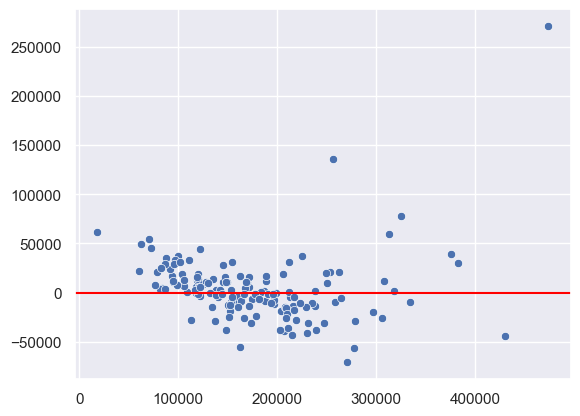

In [32]:
sns.scatterplot(y=(y_test.values - y_pred), x=y_pred)
plt.axhline(0, color='red')